In [25]:
import shap
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [26]:
data = load_wine()

In [54]:
X, y = data['data'], data['target']
data['target_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [56]:
clf.score(X_test, y_test)

1.0

In [57]:
clf.predict([X_test[0]])

array([0])

In [58]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 5))

In [59]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 36/36 [00:01<00:00, 21.80it/s]


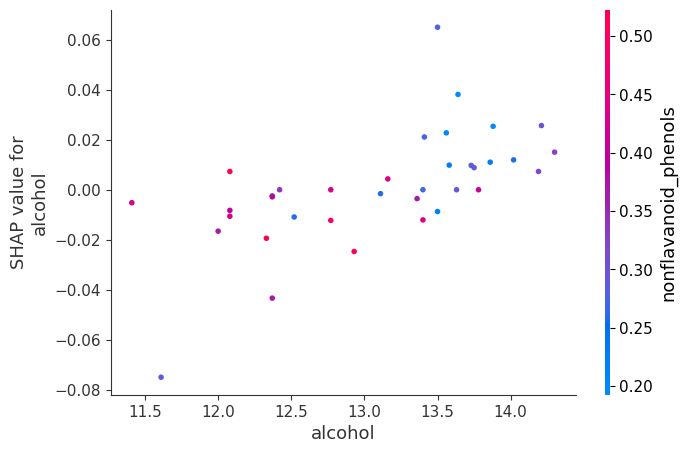

In [60]:
shap.dependence_plot(0, shap_values, X_test, feature_names=data['feature_names']) # Aqui temos o gráfico de dependência para a primeira característica.
# Esse gráfico mostra a relação entre o valor da característica e o valor SHAP, que indica a contribuição dessa característica para a predição do modelo.

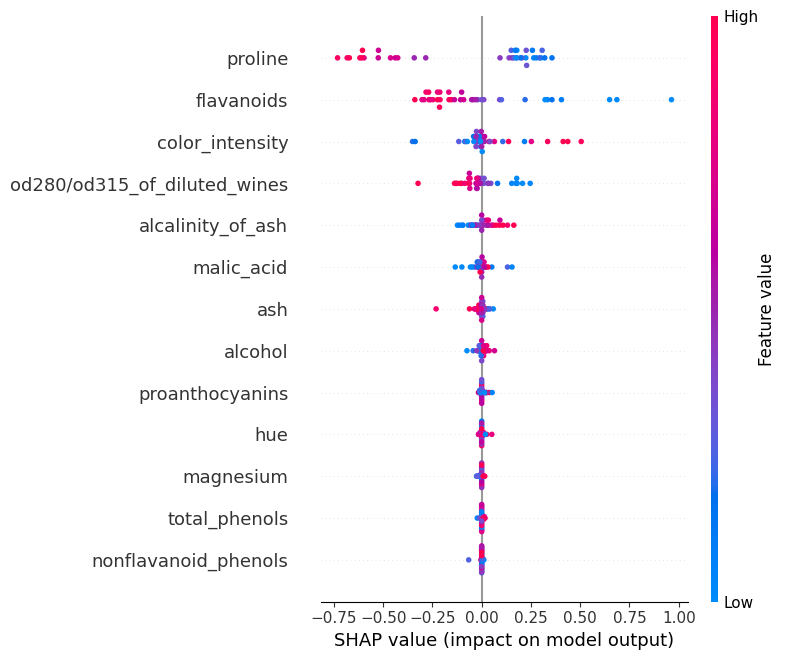

In [61]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names'])

In [63]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data['feature_names'])

In [64]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [65]:
feature_names = data['feature_names']
feature_importance = sorted(zip(feature_names, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

In [66]:
feature_importance

[('proline', np.float64(0.3437581813948618)),
 ('flavanoids', np.float64(0.23772620348219153)),
 ('color_intensity', np.float64(0.10825495735744559)),
 ('od280/od315_of_diluted_wines', np.float64(0.08167190921290071)),
 ('alcalinity_of_ash', np.float64(0.051147380726013936)),
 ('malic_acid', np.float64(0.027769000882853435)),
 ('ash', np.float64(0.021535854169690522)),
 ('alcohol', np.float64(0.015009096339035953)),
 ('proanthocyanins', np.float64(0.008540372186143539)),
 ('hue', np.float64(0.006745233001855879)),
 ('magnesium', np.float64(0.006352432811040796)),
 ('total_phenols', np.float64(0.004702638016780703)),
 ('nonflavanoid_phenols', np.float64(0.0034136371463036742))]

In [67]:
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

proline: 0.3438
flavanoids: 0.2377
color_intensity: 0.1083
od280/od315_of_diluted_wines: 0.0817
alcalinity_of_ash: 0.0511
malic_acid: 0.0278
ash: 0.0215
alcohol: 0.0150
proanthocyanins: 0.0085
hue: 0.0067
magnesium: 0.0064
total_phenols: 0.0047
nonflavanoid_phenols: 0.0034
